In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.colors import LogNorm
import copy
from hessian import *
from system import *

# Single (truncated) BChla

In [2]:
wavenumbers = get_wavenumbers("monomer_normal_modes.molden")
frequencies = wavenumber_to_frequency(wavenumbers)

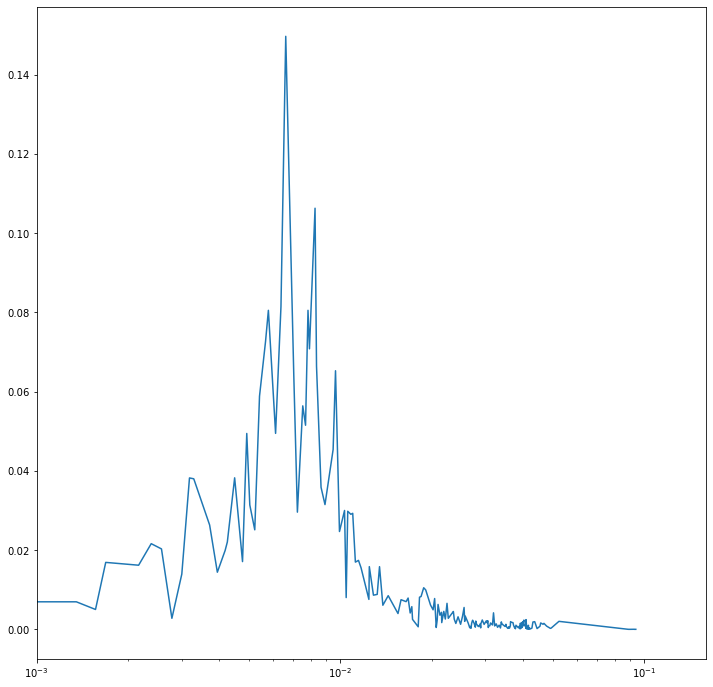

In [3]:
fig, ax = plt.subplots()

n_atoms = 79
n_modes = 3 * n_atoms - 6

Mg_index = 0

all_displacements = get_all_displacements("monomer_normal_modes.molden", n_atoms, n_modes)
    
ax.plot(frequencies, all_displacements[Mg_index])

ax.set_xlim(1e-3, 0.16)

ax.set_xscale('log')

fig.set_size_inches(12,12)

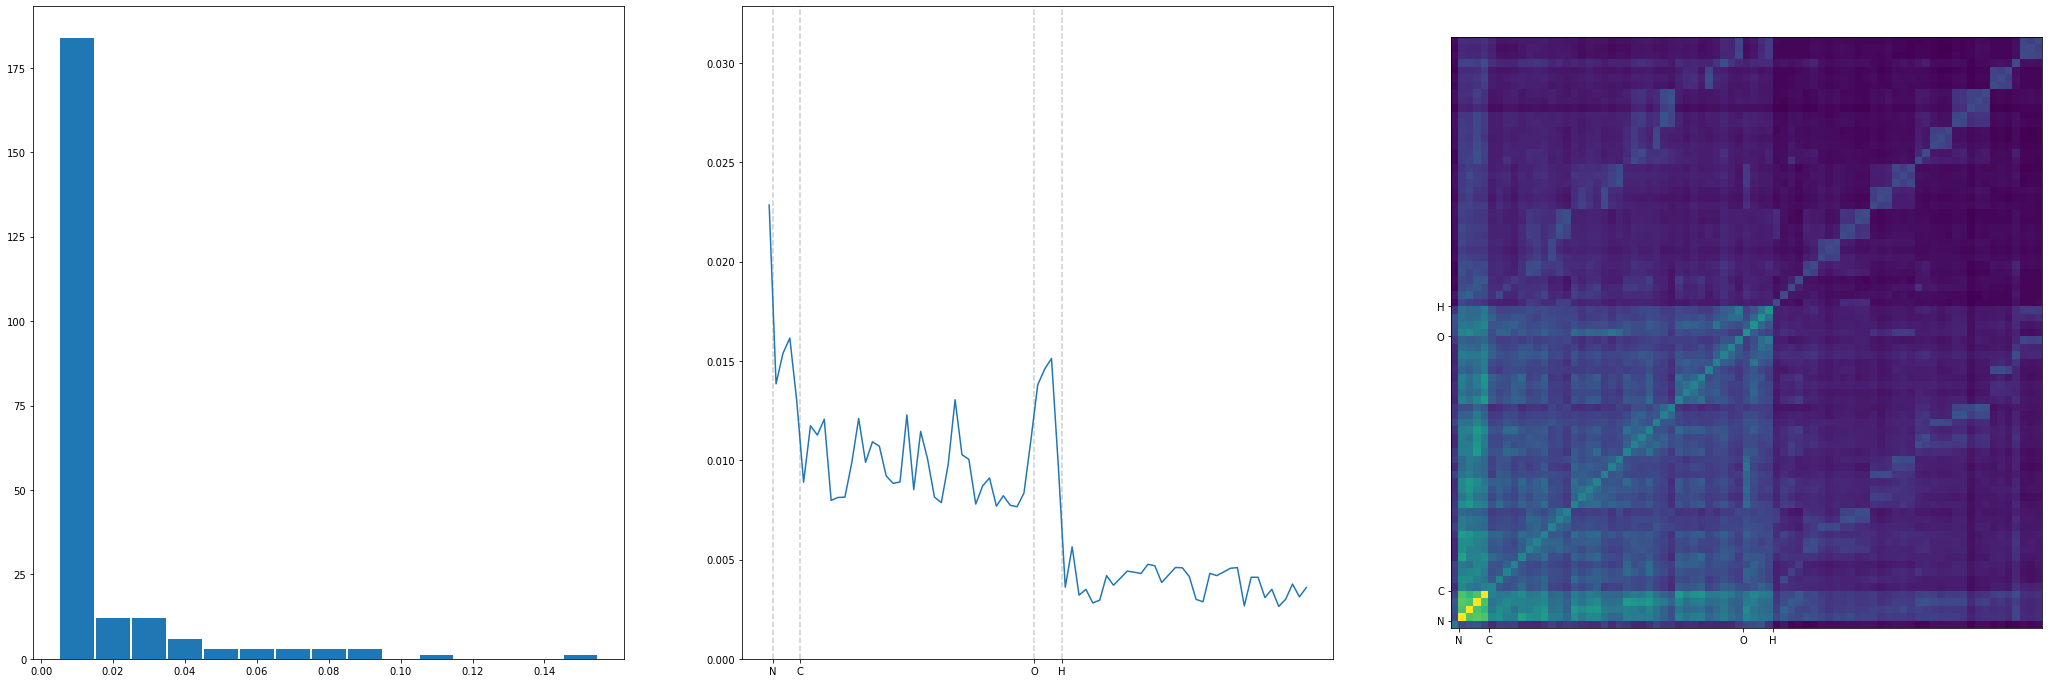

In [4]:
fig, ax = plt.subplots(1, 3)

symbols = read_symbols("monomer.xyz")

Mg_indices= get_indices(symbols, "Mg")
N_indices = get_indices(symbols, "N")
C_indices = get_indices(symbols, "C")
O_indices = get_indices(symbols, "O")
H_indices = get_indices(symbols, "H")

Mg_max_disp= all_displacements[Mg_indices].max()
N_max_disp = all_displacements[N_indices].max()
C_max_disp = all_displacements[C_indices].max()
O_max_disp = all_displacements[O_indices].max()
H_max_disp = all_displacements[H_indices].max()

normalized_displacements = copy.copy(all_displacements)

normalized_displacements[Mg_indices]/= Mg_max_disp
normalized_displacements[N_indices] /= N_max_disp
normalized_displacements[C_indices] /= C_max_disp
normalized_displacements[O_indices] /= O_max_disp
normalized_displacements[H_indices] /= H_max_disp

grouped_symbols = np.concatenate((Mg_indices, N_indices, C_indices, O_indices, H_indices))

normalized_displacements = normalized_displacements[grouped_symbols]

bins = np.linspace(0, 0.15, 16)
his = np.histogram(all_displacements[Mg_index], bins=bins)


ax[0].bar(his[1][1:], his[0], width=0.15/len(bins), align='center')
ax[0].set_xticks(bins[::2])

Mg_displacements = np.where(all_displacements[Mg_index] > 0.0)[0]

correlation = np.zeros((n_atoms, n_atoms))

for i in Mg_displacements:
    correlation += np.outer(normalized_displacements[:,i], normalized_displacements[:,i])
    
correlation /= len(Mg_displacements)

cax = ax[2].imshow(correlation, origin='lower', cmap=plt.get_cmap('viridis'))#, norm=LogNorm(vmin=0.0001, vmax=20))
    
#fig.colorbar(cax)

# number of each element --  Mg: 1, N: 4, C: 34, O: 4, H: 36
# cumulative -- 1, 5, 39, 43, 79

symbol_ticks = [0.5, 4.5, 38.5, 42.5]
symbol_labels= ["N","C","O","H"]

ax[2].set_xticks(symbol_ticks)
ax[2].set_xticklabels(symbol_labels)

ax[2].set_yticks(symbol_ticks)
ax[2].set_yticklabels(symbol_labels)

ax[1].plot(correlation[0])
ax[1].set_xticks(symbol_ticks)
ax[1].set_xticklabels(symbol_labels)

ax[1].vlines(symbol_ticks, color='black', linestyle='--', ymin=0, ymax=max(correlation[0])+0.01, alpha=0.2)
ax[1].set_ylim(0, max(correlation[0])+0.01)

fig.set_size_inches(36,12)

[ 31  39  30  28  37  27  32  38  40  44  33  26  35  36  29  23  43  21
  15  16  41  42  24  46  48  34  50  49  17  25  45   6  20  11  12  19
  52  22  51   9  10  55  58  53  18  14  72  73  57  56  60  71  70  47
  65  76  54  63  64   7  85  79  74  59  67  94  61   8  75  83  87   5
  81 126  66  88  62  80  96  93  91  13  86  84  89  68 173  78 115 167
 104 120 117 108 195  95 118 103 146 185 166 164 134 184 147 174  82 148
 162 186 119 189 124  97 158 191 102   2  90 105 135 109 112 130 114 127
 136 190  92 139 116 129 137 171 106 125 132 160 169 153 179 149 168   3
 123 145 122 170 155 128 161 175 110 192   4 165 188 100 140 138   1 111
 143  69  99 107 131 151  77 163 121 150  98 181 157 113 154 133 144 194
 142 183 101 141 172 193 187 159 152 156 178 176   0 182 177 207 180 206
 199 215 219 196 201 214 208 203 220 225 200 223 204 230 229 205 218 226
 210 217 211 197 209 222 198 202 213 212 228 227 224 216 221]


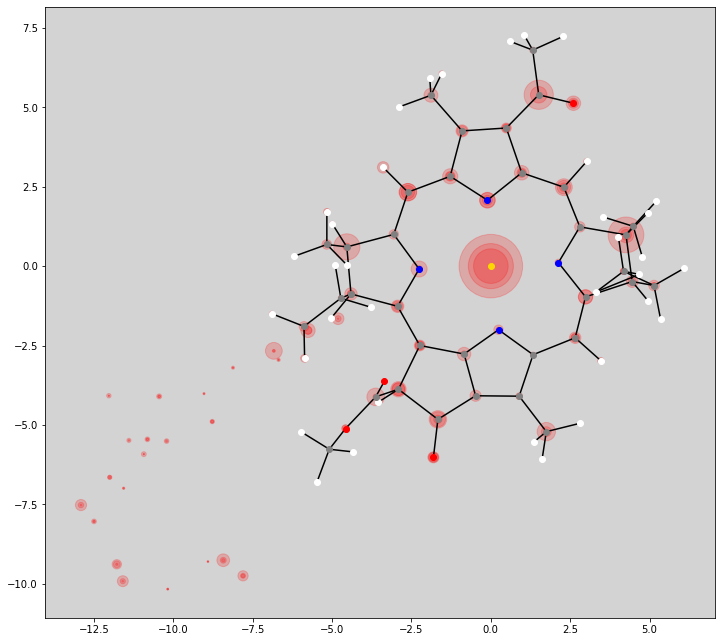

In [35]:
symbols = read_symbols("opt_bchla.xyz")

bchla_in_xy_plane = get_bchla_in_xy_plane()

fig, ax = plt.subplots()

plot_molecule(bchla_in_xy_plane, symbols, ax)

print(np.argsort(all_displacements[0])[::-1])

for m in [31,  39,  30]:
    mode = normalized_displacements[:, m]    
    for n in range(79):        
        circle = plt.Circle((bchla_in_xy_plane[n][0], bchla_in_xy_plane[n][1]), mode[n], color='r', alpha=0.2, zorder=0)
        ax.add_patch(circle)

fig.set_size_inches(12,12)